<a href="https://colab.research.google.com/github/trngbro/AI/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Câu 1 (2.0 điểm): Constraint Satisfaction**

## YC1.1: EightQueenSolver()

Cài đặt lớp đối tượng ***EightQueenSolver*** để giải quyết bài toán 8 quân Hậu bằng thuật toán ***backtracking***.


In [ ]:
class EightQueenSolver:
  # Tạo bảng 8x8 với tất cả các ô có giá trị ban đầu là 0
  def __init__(self):
    self.board = [['.' for x in range(8)] for y in range(8)]


  '''
  Gọi phương thức backtracking để giải quyết bài toán
  Nếu có giải pháp thì in ra màn hình bằng cách sử dụng phương thức printBoard
  Nếu không có giải pháp thì thông báo không tìm thấy giải pháp
  '''
  def solve(self):
    if self.backtracking(0):
      self.printBoard()
    else:
      print("Không tìm thấy giải pháp nào.")

  def backtracking(self, col):
    # Nếu đã duyệt hết 8 cột thì trả về True, báo hiệu tìm thấy giải pháp
    if col == 8:
      return True

    # Duyệt qua tất cả các hàng trong cột hiện tại
    for row in range(8):
      # Kiểm tra xem vị trí đó có thể đặt được quân hậu hay không
      if self.isValid(row, col):
        # Nếu có thể đặt được, đặt quân hậu vào vị trí đó và đệ quy tìm giải pháp cho cột tiếp theo
        self.board[row][col] = 'Q'
        if self.backtracking(col + 1):
          return True
        # Nếu không tìm thấy giải pháp cho cột tiếp theo, quay trở lại vị trí cũ và tiếp tục thử các vị trí khác
        self.board[row][col] = '.'
    # Nếu đã thử tất cả các vị trí trong cột mà không tìm thấy giải pháp, trả về False
    return False

  def isValid(self, row, col):
    # Kiểm tra xem có quân hậu nào trên cùng hàng không
    for i in range(col):
      if self.board[row][i] == 'Q':
        return False

    # Kiểm tra xem có quân hậu nào trên đường chéo trái không
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
      if self.board[i][j] == 'Q':
        return False

    # Kiểm tra xem có quân hậu nào trên đường chéo phải không
    for i, j in zip(range(row, 8, 1), range(col, -1, -1)):
      if self.board[i][j] == 'Q':
        return False
    # nếu không bị xung đột với các quân hậu đã đặt trước đó thì trả về True
    return True  
      

  def printBoard(self):
    for i in range(8):
      for j in range(8):
        print(self.board[i][j], end = " ")
      print() 

**Lớp kiểm thử sử dụng cho EightQueenSolver:**

*   ***B1***: Khởi tạo đối tượng `EightQueenSolver`

*   ***B2***: *(Mở rộng)* Dùng `self.printBoard()` để xem bàn cờ đã khởi tạo

*   ***B3***: Sử dụng self.solve() để xử lý bàn cờ vừa mới khởi tạo

In [ ]:
# Khởi tạo đối tượng EightQueenSolver là solver
solver = EightQueenSolver()
print("Bàn cờ trống 8x8, sau khi khởi tạo:\n")
solver.printBoard()

# Xử lý bàn cờ, sử dụng backtracking (dựa vào thuật toán backtracking ở lesson 05 - Constraint Satisfaction/ trang 16):
print("\n\n\nBàn cờ sau khi xử lý")
solver.solve()

Bàn cờ trống 8x8, sau khi khởi tạo:

. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 
. . . . . . . . 



Bàn cờ sau khi xử lý
Q . . . . . . . 
. . . . . . Q . 
. . . . Q . . . 
. . . . . . . Q 
. Q . . . . . . 
. . . Q . . . . 
. . . . . Q . . 
. . Q . . . . . 


## YC1.2: NQueenSolver()

Cài đặt lớp đối tượng ***NQueenSolver*** để giải quyết bài toán n quân Hậu bằng thuật toán ***backtracking*** trong trường hợp tổng quát với N là kích thước của bàn cờ (N dòng, N cột).

In [ ]:
class NQueenSolver:
  def __init__(self, N: int):
    self.N = N
    self.board = [['.' for x in range(N)] for x in range(N)]

  def solve(self) -> None:
    if self.backtracking(0):
      for row in self.board:
        print(' '.join(row))
    else:
      print('UNSOLVABLE')

  def backtracking(self, col: int):
    if col == self.N:
      return True
    for row in range(self.N):
        if self.isValid(row, col):
          self.board[row][col] = 'Q'
          if self.backtracking(col + 1):
            return True
          self.board[row][col] = '.'
    return False

  def isValid(self, row: int, col: int):
    for c in range(col):
      if self.board[row][c] == 'Q':
        return False

    for r, c in zip(range(row, -1, -1), range(col, -1, -1)):
      if self.board[r][c] == 'Q':
        return False

    for r, c in zip(range(row, self.N), range(col, -1, -1)):
      if self.board[r][c] == 'Q':
        return False

    return True
  def printBoard(self):
    for i in range(self.N):
      for j in range(self.N):
        print(self.board[i][j], end = " ")
      print() 

**Lớp kiểm thử sử dụng cho NQueenSolver:**

*   ***B1***: Khởi tạo đối tượng `NQueenSolver`

*   ***B2***: *(Mở rộng)* Dùng `self.printBoard()` để xem bàn cờ đã khởi tạo

*   ***B3***: Sử dụng self.solve() để xử lý bàn cờ vừa mới khởi tạo

In [ ]:
# Khởi tạo đối tượng NQueenSolver là solver với BOARD_SIZE là kích thước bàn cờ
BOARD_SIZE = 24
solver = NQueenSolver(BOARD_SIZE)
print("Bàn cờ trống NxN, sau khi khởi tạo:")
solver.printBoard()

# Xử lý bàn cờ, sử dụng backtracking (dựa vào thuật toán backtracking ở lesson 05 - Constraint Satisfaction/ trang 16):
print("\n\n\nBàn cờ sau khi xử lý")
solver.solve()

Bàn cờ trống NxN, sau khi khởi tạo:
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . .

# Câu 2 (2.0 điểm): Adversarial Search

Chạy đoạn mã dưới đây, ngay sau khi xuất hiện **Choose Files** thì lập tức bấm vào và chọn file txt input để chạy thuật toán. Sau quá trình tải lên *(đạt 100% trạng thái)* thì sẽ xuất ra màn hình thông tin file tải lên. Kiểm tra và chắc chắn là tải lên đúng file.

Có thể lấy file mẫu tại đây: [minimax.txt](https://github.com/trngbro/AI/blob/main/input/minimax.txt)

Cũng có thể kiểm tra rằng file đã tải lên hay chưa bằng cách kiểm tra có file minimax.txt tồn tại ở folder colab hay chưa (hình minh hoạ đính kèm).





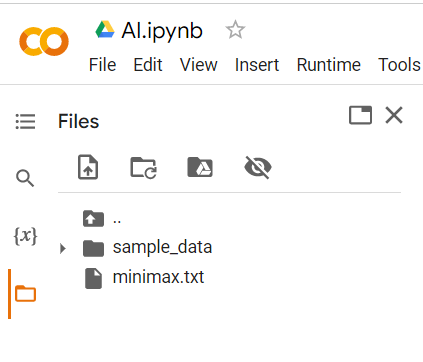



In [ ]:
import os.path
from google.colab import files

if not (os.path.isfile("minimax.txt")):
  uploaded = files.upload()
  file_name = "minimax.txt"
with open('minimax.txt', 'r') as f:
  data = f.readlines()
  print("Các dòng đầu của file:")
  for line in data[:8]:
      print(line)

Saving minimax.txt to minimax.txt
Các dòng đầu của file:
47	27

n00	n10

n00	n11

n10	n20

n10	n21

n10	n22

n11	n23

n11	n24



## YC2.1: Cài đặt hai lớp theo mô tả


Phương thức **`print_tree`** được sử dụng để in cây Minimax theo định dạng bắt đầu từ nút gốc và tiếp tục xuống các nút con theo độ sâu của cây.


Phương thức **`read`** được sử dụng để đọc tệp đầu vào chứa các nút và kết nối giữa chúng. Đầu tiên, nó đọc số lượng cặp nút và kết nối từ tệp đầu vào và tạo các nút tương ứng cho chúng. Sau đó, nó đọc các nút cuối cùng và giá trị tương ứng của chúng. Cuối cùng, nó thiết lập nút gốc, tập các nút cuối cùng và giá trị tương ứng và danh sách kế tiếp của mỗi nút.


Phương thức **`minimax`** là thuật toán Minimax, nó thực hiện tính toán Minimax Decision của một nút. Nếu nút đó là nút cuối cùng, giá trị của nó sẽ được trả về. Nếu nút là nút max, giá trị lớn nhất của các nút con sẽ được chọn. Nếu nút là nút min, giá trị nhỏ nhất của các nút con sẽ được chọn.


Phương thức **`run`** sử dụng thuật toán Minimax để tính toán Minimax Decision cho mỗi nút trong cây và trả về một từ điển kết quả, với các khóa là các identifier của các nút và các giá trị tương ứng là Minimax Decision của các nút đó.

In [ ]:
class Node:
  def __init__(self, identifier, value=None):
    self.identifier = identifier  
    self.value = value
    self.successors = []    # Danh sách các Node kế tiếp

  def __str__(self):
    return f"({self.identifier}, {self.value})"

class MinimaxDecision:
  def __init__(self, root=None, terminalStates=None, successors=None):
    self.root = root
    self.terminalStates = terminalStates
    self.successors = successors

  def print_tree(self, node, level=0):
    print("\t" * level, node)
    for succ in node.successors:
      self.print_tree(succ, level+1)

  # Đọc từng cặp node và node kế tiếp và tạo các node
  def read(self, filename):
    with open(filename, "r") as f:
      e, l = map(int, f.readline().split())
      nodes_dict = {}
      for i in range(e):
        a, b = f.readline().split()
        if a not in nodes_dict:
          nodes_dict[a] = Node(a)
        if b not in nodes_dict:
          nodes_dict[b] = Node(b)
        nodes_dict[a].successors.append(nodes_dict[b])
      # Đọc terminal node và giá trị tương ứng
      for i in range(l):
        node, value = f.readline().split()
        nodes_dict[node].value = int(value)
    self.root = nodes_dict["n00"]   # Thiết lập node gốc
    self.terminalStates = {n.identifier: n.value for n in nodes_dict.values() if not n.successors}
    self.successors = {n: n.successors for n in nodes_dict.values()}

  def minimax(self, node, maximizingPlayer):
    # Nếu đang là terminal node thì trả về nó
    if node.identifier in self.terminalStates:
      return self.terminalStates[node.identifier]
    # Nếu node là node max, chọn giá trị lớn nhất của các node con
    elif maximizingPlayer:
      maxEval = float('-inf')
      for child in self.successors[node]:
        eval = self.minimax(child, False)
        maxEval = max(maxEval, eval)
      return maxEval
    # Nếu node là node min, chọn giá trị nhỏ nhất của các node con
    else:
      minEval = float('inf')
      for child in self.successors[node]:
        eval = self.minimax(child, True)
        minEval = min(minEval, eval)
      return minEval

  def run(self):
    result = {}
    for node in self.successors:
        result[node.identifier] = self.minimax(node, False)
      return result


**Lớp kiểm thử sử dụng cho MinimaxDecision:**

*   ***B1***: Khởi tạo đối tượng `MinimaxDecision`

*   ***B2***: Dùng `self.read(*/truyền vào đường dẫn/*)` để đọc input

*   ***B3***: Sử dụng self.run() để chạy giải thuật Minimax Decision

*   ***B3***: Sử dụng self.print_tree() để vẽ cây

## YC2.2: Cài đặt hàm print()


In [ ]:
# Tạo đối tượng MinimaxDecision
decision = MinimaxDecision()

# Dùng self.read(file) để đọc dữ liệu từ file lên cho đối tượng vừa khởi tạo
decision.read("minimax.txt")

# In cây
print("\n\n\nVẽ cây:\n\n")
decision.print_tree(decision.root)




Vẽ cây:


 (n00, None)
	 (n10, None)
		 (n20, None)
			 (n30, None)
				 (n41, 4)
				 (n42, 3)
				 (n43, 5)
			 (n31, None)
				 (n44, 2)
				 (n45, 1)
		 (n21, None)
			 (n32, None)
				 (n46, 4)
				 (n47, 2)
				 (n48, 3)
		 (n22, None)
			 (n33, None)
				 (n49, 5)
				 (n410, 4)
			 (n34, None)
				 (n411, 7)
			 (n35, None)
				 (n412, 3)
				 (n413, 2)
	 (n11, None)
		 (n23, None)
			 (n36, None)
				 (n414, 1)
				 (n415, 4)
				 (n416, 0)
		 (n24, None)
			 (n37, None)
				 (n417, 5)
				 (n418, 3)
			 (n38, None)
				 (n419, 0)
		 (n25, None)
			 (n39, None)
				 (n420, 2)
				 (n421, 7)
				 (n422, 4)
			 (n310, None)
				 (n423, 3)
				 (n424, 6)
			 (n311, None)
				 (n425, 5)
				 (n426, 3)
				 (n427, 1)


## YC2.3: Cài đặt hàm run()


In [ ]:
import json

# Tạo đối tượng MinimaxDecision
decision = MinimaxDecision()

# Dùng self.read(file) để đọc dữ liệu từ file lên cho đối tượng vừa khởi tạo
decision.read("minimax.txt")

# Dùng self.run() để thực hiện thuật toán Minimax Decision
result = decision.run()

# Dùng thêm JSON để hiển thị kết quả được đẹp hơn có thể thay thế bằng print(result)
print("Kết quả thực hiện thuật toán:")
print(json.dumps(result, sort_keys=False, indent=4))

# Nếu muốn truy xuất vào một kết quả cụ thể thì cập nhật giá trị biến dưới đây
NODE_ID_MINIMACDECISION = "n00"
print("\n\n\n\nXem chi tiết:")
print("MinimaxDecision cho {} là {}".format(NODE_ID_MINIMACDECISION, result[NODE_ID_MINIMACDECISION]))


Kết quả thực hiện thuật toán:
{
    "n00": 4,
    "n10": 2,
    "n11": 0,
    "n20": 2,
    "n21": 4,
    "n22": 3,
    "n23": 4,
    "n24": 0,
    "n25": 5,
    "n30": 3,
    "n31": 1,
    "n32": 2,
    "n33": 4,
    "n34": 7,
    "n35": 2,
    "n36": 0,
    "n37": 3,
    "n38": 0,
    "n39": 2,
    "n310": 3,
    "n311": 1,
    "n41": 4,
    "n42": 3,
    "n43": 5,
    "n44": 2,
    "n45": 1,
    "n46": 4,
    "n47": 2,
    "n48": 3,
    "n49": 5,
    "n410": 4,
    "n411": 7,
    "n412": 3,
    "n413": 2,
    "n414": 1,
    "n415": 4,
    "n416": 0,
    "n417": 5,
    "n418": 3,
    "n419": 0,
    "n420": 2,
    "n421": 7,
    "n422": 4,
    "n423": 3,
    "n424": 6,
    "n425": 5,
    "n426": 3,
    "n427": 1
}




Xem chi tiết:
MinimaxDecision cho n00 là 4


# Câu 3 (2.0 điểm): Logical Agents

Tìm hiểu và sử dụng thư viện Glucose3 để giải bài tám hậu sử dụng propositional
logic. Cài đặt PySAT theo lệnh bên dưới.
Tài liệu về Glucose3: https://pysathq.github.io/docs/html/api/solvers.html

In [ ]:
!pip install python-sat==0.1.7.dev12
!pip install --upgrade python-sat


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached python_sat-0.1.7.dev12-cp39-cp39-manylinux2010_x86_64.whl (1.8 MB)
  Attempting uninstall: python-sat
    Found existing installation: python-sat 0.1.8.dev2
    Uninstalling python-sat-0.1.8.dev2:
      Successfully uninstalled python-sat-0.1.8.dev2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached python_sat-0.1.8.dev2-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.0 MB)
  Attempting uninstall: python-sat
    Found existing installation: python-sat 0.1.7.dev12
    Uninstalling python-sat-0.1.7.dev12:
      Successfully uninstalled python-sat-0.1.7.dev12


In [ ]:
'''
Sử dụng thư viện Glucose3
'''

from pysat.solvers import Glucose3

## YC3.1: EightQueenSolver() bằng Glucose3 với CNF clauses.

Để giải quyết bài toán này, lớp **`EightQueenSolver`** sử dụng thư viện Glucose3 để giải quyết bài toán SAT. Bài toán SAT là bài toán quyết định tính đúng/sai của một mệnh đề logic. Trong trường hợp này, mỗi biến SAT được đại diện bởi một ô trên bàn cờ, và mỗi giá trị SAT của một biến đại diện cho việc có hoặc không có một quân hậu đặt trên ô đó.

Để xác định việc đặt tám quân hậu mà không có quân hậu nào tấn công được nhau, lớp **`EightQueenSolver`** sử dụng các ràng buộc sau:

Mỗi hàng trên bàn cờ phải chứa đúng một quân hậu.
Mỗi cột trên bàn cờ phải chứa đúng một quân hậu.
Không có hai quân hậu nào được đặt trên cùng một đường chéo chính hoặc đường chéo phụ.
Các ràng buộc này được biểu diễn bằng các phép toán logic và được thêm vào bộ giải SAT bằng phương thức `add_clause()`. Sau đó, phương thức `solve()` được gọi để giải quyết bài toán SAT và trả về kết quả giải quyết.

Nếu bài toán có nghiệm, phương thức `get_model()` được sử dụng để lấy giá trị của biến SAT đã được giải quyết và sử dụng để cập nhật bàn cờ. Nếu không có nghiệm, thông báo "*UNSOLVABLE*" sẽ được in ra màn hình. Cuối cùng, bàn cờ sẽ được hiển thị bằng cách in các ký tự `"."` (ô trống) và `"Q"` (quân hậu) trên màn hình.

In [ ]:
class EightQueenSolver:
  def __init__(self):
    self.board = [["." for i in range(8)] for j in range(8)]
    self.solver = Glucose3()

  def add_clause(self, clause):
    self.solver.add_clause(clause)

  def solve(self):
    # Thêm clauses cho ràng buộc hàng
    for i in range(8):
      clause = []
      for j in range(8):
        symbol = i * 8 + j + 1
        clause.append(symbol)
      self.add_clause(clause)
      for j in range(8):
        for k in range(j + 1, 8):
          symbol1 = i * 8 + j + 1
          symbol2 = i * 8 + k + 1
          self.add_clause([-symbol1, -symbol2])

    # Thêm clauses cho ràng buộc cột
    for j in range(8):
      clause = []
      for i in range(8):
        symbol = i * 8 + j + 1
        clause.append(symbol)
      self.add_clause(clause)
      for i in range(8):
        for k in range(i + 1, 8):
            symbol1 = i * 8 + j + 1
            symbol2 = k * 8 + j + 1
            self.add_clause([-symbol1, -symbol2])

    # Thêm clauses cho ràng buộc đường chéo
    for i in range(8):
      for j in range(8):
        for k in range(1, 8):
          if i + k < 8 and j + k < 8:
            symbol1 = i * 8 + j + 1
            symbol2 = (i + k) * 8 + (j + k) + 1
            self.add_clause([-symbol1, -symbol2])
          if i + k < 8 and j - k >= 0:
            symbol1 = i * 8 + j + 1
            symbol2 = (i + k) * 8 + (j - k) + 1
            self.add_clause([-symbol1, -symbol2])

    # Xử lý bàn cờ
    if self.solver.solve():
      model = self.solver.get_model()
      for i in range(8):
        for j in range(8):
          symbol = i * 8 + j + 1
          if symbol in model:
            self.board[i][j] = "Q"
          else:
            self.board[i][j] = "."
      for row in self.board:
        print(" ".join(row))
    else:
      print("UNSOLVABLE")


**Lớp kiểm thử sử dụng cho EightQueenSolver:**

*   ***B1***: Khởi tạo đối tượng `EightQueenSolver`

*   ***B2***: *(Mở rộng)* Dùng `for row in solver.board:print(" ".join(row))` để xem bàn cờ đã khởi tạo

*   ***B3***: Sử dụng self.solve() để xử lý bàn cờ vừa mới khởi tạo

In [ ]:
solver = EightQueenSolver()
print("Bàn cờ trống 8x8, sau khi khởi tạo:")
for row in solver.board:print(" ".join(row))
print("\n\n\nBàn cờ sau khi xử lý")
solver.solve()

Bàn cờ trống 8x8, sau khi khởi tạo:
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .



Bàn cờ sau khi xử lý
. . . Q . . . .
. Q . . . . . .
. . . . . . Q .
. . Q . . . . .
. . . . . Q . .
. . . . . . . Q
. . . . Q . . .
Q . . . . . . .


## YC3_2: NQueenSolver bằng Glucose3 với CNF clauses

Tương tự EightQueenSolver() phân tích chi tiết lại các hàm:
*    `init(self, n)`: Một hàm khởi tạo với một tham số n, đại diện cho kích thước của bàn cờ. Bàn cờ được khởi tạo với các giá trị mặc định của "." và một bộ giải Glucose3 được tạo ra.

*    `add_clause(self, clause)`: Một hàm để thêm một mệnh đề logic vào bộ giải của lớp.

*    `solve(self)`: Hàm chính để giải bài toán N-Queen. Nó bao gồm ba phần chính:

1.    Thêm ràng buộc hàng: Với mỗi hàng trên bàn cờ, tạo ra một mệnh đề với các biến đại diện cho các ô trong hàng đó và thêm mệnh đề này vào bộ giải của lớp. Sau đó, thêm các ràng buộc bổ sung để đảm bảo rằng không có hai quân hậu nào được đặt trên cùng một hàng.

1.    Thêm ràng buộc cột: Tương tự như ràng buộc hàng, với mỗi cột trên bàn cờ, tạo ra một mệnh đề với các biến đại diện cho các ô trong cột đó và thêm mệnh đề này vào bộ giải của lớp. Sau đó, thêm các ràng buộc bổ sung để đảm bảo rằng không có hai quân hậu nào được đặt trên cùng một cột.

1.    Thêm ràng buộc đường chéo: Tương tự như ràng buộc hàng và ràng buộc cột, với mỗi ô trên bàn cờ, tạo ra các ràng buộc để đảm bảo rằng không có hai quân hậu nào được đặt trên cùng một đường chéo.

1.    Nếu bài toán có lời giải, bàn cờ sẽ được cập nhật với vị trí của các quân hậu và hiển thị ra màn hình. Nếu không, sẽ in ra thông báo "UNSOLVABLE".





In [ ]:
class NQueenSolver:
  def __init__(self, n):
    self.n = n
    self.board = [["." for i in range(n)] for j in range(n)]
    self.solver = Glucose3()

  def add_clause(self, clause):
    self.solver.add_clause(clause)

  def solve(self):
    # Thêm clauses cho ràng buộc hàng
    for i in range(self.n):
      clause = []
      for j in range(self.n):
        symbol = i * self.n + j + 1
        clause.append(symbol)
      self.add_clause(clause)
      for j in range(self.n):
        for k in range(j + 1, self.n):
          symbol1 = i * self.n + j + 1
          symbol2 = i * self.n + k + 1
          self.add_clause([-symbol1, -symbol2])

    # Thêm clauses cho ràng buộc cột
    for j in range(self.n):
      clause = []
      for i in range(self.n):
        symbol = i * self.n + j + 1
        clause.append(symbol)
      self.add_clause(clause)
      for i in range(self.n):
        for k in range(i + 1, self.n):
          symbol1 = i * self.n + j + 1
          symbol2 = k * self.n + j + 1
          self.add_clause([-symbol1, -symbol2])

    # Thêm clauses cho ràng buộc đường chéo
    for i in range(self.n):
      for j in range(self.n):
        for k in range(1, self.n):
          if i + k < self.n and j + k < self.n:
            symbol1 = i * self.n + j + 1
            symbol2 = (i + k) * self.n + (j + k) + 1
            self.add_clause([-symbol1, -symbol2])
          if i + k < self.n and j - k >= 0:
            symbol1 = i * self.n + j + 1
            symbol2 = (i + k) * self.n + (j - k) + 1
            self.add_clause([-symbol1, -symbol2])

    # Xử lý bài toán
    if self.solver.solve():
      model = self.solver.get_model()
      for i in range(self.n):
        for j in range(self.n):
          symbol = i * self.n + j + 1
          if symbol in model:
            self.board[i][j] = "Q"
          else:
            self.board[i][j] = "."
      for row in self.board:
        print(" ".join(row))
    else:
      print("UNSOLVABLE")


**Lớp kiểm thử sử dụng cho NQueenSolver:**

*   ***B1***: Khởi tạo đối tượng `NQueenSolver`

*   ***B2***: *(Mở rộng)* Dùng `for row in solver.board:print(" ".join(row))` để xem bàn cờ đã khởi tạo

*   ***B3***: Sử dụng self.solve() để xử lý bàn cờ vừa mới khởi tạo

In [ ]:
solver = NQueenSolver(25)
print("Bàn cờ trống NxN, sau khi khởi tạo:")
for row in solver.board:print(" ".join(row))
print("\n\n\nBàn cờ sau khi xử lý")
solver.solve()

Bàn cờ trống NxN, sau khi khởi tạo:
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . . . . . .
. . . . . . . 

# Câu 4 (2.0 điểm): Machine Learning

Nghiên cứu và sử dụng các thư viện:

• Decision Tree: https://scikit-learn.org/stable/modules/tree.html

• Naïve Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html

• k-NN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

để xây dựng ba mô hình phân loại chữ số viết tay trong tập MNIST.



---


***Cài đặt thư viện***

In [ ]:
!pip install keras-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

***Sử dụng thư viện và tải các tập tin `tranning` và `test`***



In [ ]:
from keras.datasets import mnist
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump, load
import numpy as np
import joblib

(train_X, train_y), (test_X, test_y) = mnist.load_data()


Chú thích:



*   `train_X`: mảng numpy 2 chiều (60000, 28, 28) chứa ảnh huấn luyện của MNIST. Các ảnh này được mã hóa dưới dạng ma trận 28x28 pixel (tổng cộng 784 pixel), mỗi pixel có giá trị từ 0 đến 255.
*   `train_y`: mảng numpy 1 chiều (60000,) chứa nhãn lớp tương ứng với các ảnh huấn luyện. Các nhãn này là các số nguyên từ 0 đến 9, mô tả cho mỗi ảnh là chữ số gì.
*   `test_X`: mảng numpy 2 chiều (10000, 28, 28) chứa ảnh kiểm tra của MNIST. Các ảnh này có cùng định dạng với ảnh huấn luyện.
*   `test_y`: mảng numpy 1 chiều (10000,) chứa nhãn lớp tương ứng với các ảnh kiểm tra. Các nhãn này là các số nguyên từ 0 đến 9, mô tả cho mỗi ảnh là chữ số gì.

Tìm hiểu thêm tại [MNIST dataset](https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python) 






## YC4.1: Xây dựng mô hình Decision Tree

Đầu tiên phải làm phẳng các dữ liệu hình ảnh trong tập huấn luyện và tập kiểm tra bằng cách sử dụng hàm `reshape` để biến chúng thành một vector.

Tiếp theo, một mô hình Decision Tree Classifier được khởi tạo và được huấn luyện trên tập dữ liệu huấn luyện. Sau đó, mô hình được đánh giá trên cả tập huấn luyện và tập kiểm tra để tính toán độ chính xác.

Mô hình được lưu vào một tệp có tên là "`dt_clf.joblib`" bằng cách sử dụng hàm `joblib.dump`.

Sau đó, mô hình được tải lại bằng cách sử dụng hàm `joblib.load` và được sử dụng để thực hiện dự đoán trên một số mẫu trong tập kiểm tra.

Cuối cùng, cây quyết định được vẽ bằng cách sử dụng hàm `plot_tree` trong thư viện `scikit-learn` và thư viện `matplotlib.pyplot` để hiển thị biểu đồ.

Độ chính xác trên tập train: 1.0
Độ chính xác trên tập test:  0.8765
Kết quả tính prediction cho 5 input: [7 2 1 0 4]




Trực quan hoá cây:


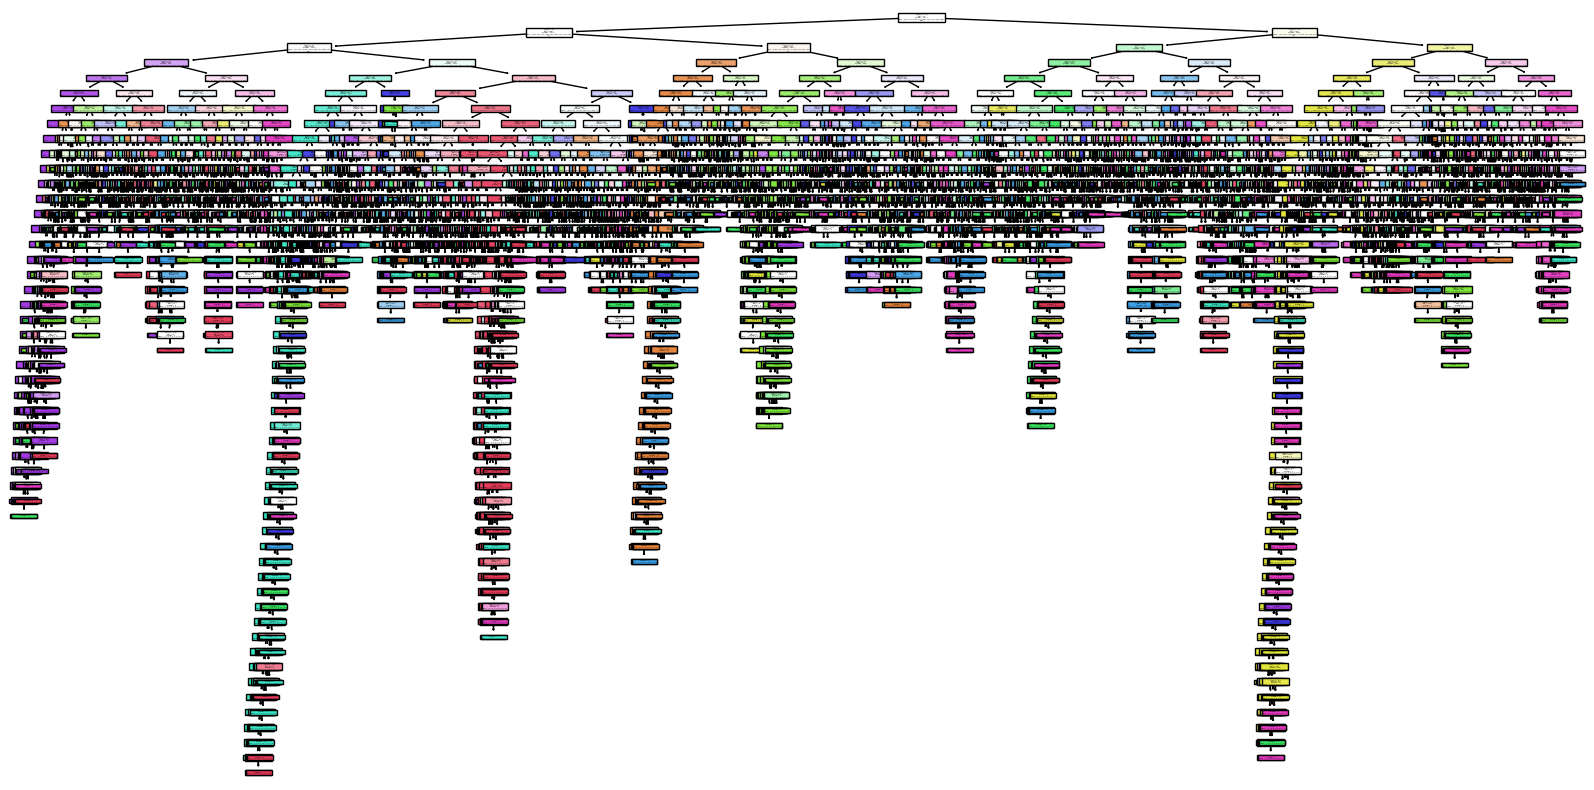

In [ ]:
# Flatten data
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

# Học dữ liệu trên tập training
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_X, train_y)

# Tính độ chính xác trên tập training và tập test
train_y_pred = dt_clf.predict(train_X)
test_y_pred = dt_clf.predict(test_X)

train_acc_dt = accuracy_score(train_y, train_y_pred)
test_acc_dt = accuracy_score(test_y, test_y_pred)

print(f"Độ chính xác trên tập train: {train_acc_dt}")
print(f"Độ chính xác trên tập test:  {test_acc_dt}")

# Lưu mô hình xuống tập tin
joblib.dump(dt_clf, 'dt_clf.joblib')

# Load mô hình lên từ tập tin
dt_clf = joblib.load('dt_clf.joblib')

# Chạy inference (tính prediction) cho ít nhất 05 input samples.
samples = test_X[:5]
predictions = dt_clf.predict(samples)
print(f"Kết quả tính prediction cho 5 input: {predictions}")

# Trực quan hoá cây với hàm tree.plot_tree().
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True)

print("\n\n\n\nTrực quan hoá cây:")
plt.show()


## YC4.2: Xây dựng mô hình Naïve Bayes classifier

Sử dụng Gaussian Naive Bayes để huấn luyện mô hình trên tập dữ liệu huấn luyện `train_X` và nhãn tương ứng `train_y`.

Sử dụng mô hình đã được huấn luyện để dự đoán nhãn của tập dữ liệu huấn luyện `train_X` và tập dữ liệu kiểm tra `test_X`.

Tính toán độ chính xác của mô hình trên tập dữ liệu huấn luyện và tập dữ liệu kiểm tra bằng cách so sánh các dự đoán với nhãn thực tế và sử dụng hàm `accuracy_score`.

Lưu trữ mô hình đã được huấn luyện vào tệp '`nb_clf.joblib`' bằng cách sử dụng thư viện `joblib`.

Tải lại mô hình đã lưu trữ vào biến `nb_clf`.
Dùng mô hình đã tải lại để dự đoán nhãn của 5 mẫu đầu tiên trong tập dữ liệu kiểm tra `test_X`.
In ra các dự đoán được và vẽ ra cây phân loại của mô hình bằng hàm `plot_tree`.

In [ ]:
# Học dữ liệu trên tập training
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

# Tính độ chính xác trên tập training và tập test
train_y_pred = nb_clf.predict(train_X)
test_y_pred = nb_clf.predict(test_X)

train_acc_nb = accuracy_score(train_y, train_y_pred)
test_acc_nb = accuracy_score(test_y, test_y_pred)

print(f"Độ chính xác trên tập train: {train_acc_nb}")
print(f"Độ chính xác trên tập test:  {test_acc_nb}")

# Lưu mô hình xuống tập tin
joblib.dump(nb_clf, 'nb_clf.joblib')

# Load mô hình lên từ tập tin
nb_clf = joblib.load('nb_clf.joblib')

# Chạy inference (tính prediction) cho ít nhất 05 input samples.
samples = test_X[:5]
predictions = nb_clf.predict(samples)

print(f"Kết quả tính prediction cho 5 input: {predictions}")


Độ chính xác trên tập train: 0.5649
Độ chính xác trên tập test:  0.5558
Kết quả tính prediction cho 5 input: [9 2 1 0 9]


## YC4.3: Xây dựng mô hình k-NN

Đầu tiên, ta cần import KNeighborsClassifier và `accuracy_score` từ `scikit-learn` và reshape các mảng `train_X` và `test_X` về kích thước 1D (28*28 = 784) để có thể áp dụng vào mô hình.

Tiếp theo, ta sẽ khởi tạo đối tượng KNeighborsClassifier với tham số **`k = 5`**. Sau đó, ta sẽ gọi phương thức fit để huấn luyện mô hình trên tập training.

Sau khi mô hình đã được huấn luyện, ta sẽ sử dụng phương thức predict để dự đoán nhãn của các mẫu trong tập training và test. Ta sẽ tính độ chính xác trên tập training và tập test bằng cách so sánh nhãn dự đoán với nhãn thực tế, và sử dụng hàm `accuracy_score` của scikit-learn để tính độ chính xác.

Tiếp theo, ta sẽ lưu mô hình xuống tập tin `knn_model.sav` bằng phương thức dump của `joblib`.

Cuối cùng, ta sẽ sử dụng phương thức load của joblib để load mô hình từ tập tin `knn_model.sav`, và sử dụng phương thức predict để dự đoán nhãn của các mẫu trong tập test. Ta sẽ chọn ngẫu nhiên 5 mẫu từ tập test để kiểm tra kết quả dự đoán của mô hình.

In [ ]:
# Flatten data
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

# Học dữ liệu trên tập training với k=5
knn = KNeighborsClassifier(n_neighbors=5)

# huấn luyện mô hình
knn.fit(train_X, train_y)

# dựa đoán nhãn
train_y_pred = knn.predict(train_X)
test_y_pred = knn.predict(test_X)

# Tính độ chính xác trên tập training và tập test
train_acc_knn = accuracy_score(train_y, train_y_pred)
test_acc_knn = accuracy_score(test_y, test_y_pred)

print("Độ chính xác trên tập train:", train_acc_knn)
print("Độ chính xác trên tập test: ", test_acc_knn)

# Lưu mô hình xuống tập tin
dump(knn, 'knn_model.sav')

# Load mô hình lên từ tập tin
loaded_knn = load('knn_model.sav')

# Chạy inference (tính prediction) cho ít nhất 05 input samples.
random_test_samples = np.random.choice(test_X.shape[0], 5)
pred = []
for i in random_test_samples:
    test_sample = test_X[i].reshape(1, -1)
    pred.append(loaded_knn.predict(test_sample))
print(f"Kết quả tính prediction cho 5 input: {pred}")


Độ chính xác trên tập train: 0.9819166666666667
Độ chính xác trên tập test:  0.9688
Kết quả tính prediction cho 5 input: [array([6], dtype=uint8), array([2], dtype=uint8), array([3], dtype=uint8), array([0], dtype=uint8), array([0], dtype=uint8)]


## YC4.4: Sử dụng thư viện matplotlib.pyplot để vẽ biểu đồ cột đôi thể hiện độ chính xác trên tập training và test cho ba mô hình ở trên.

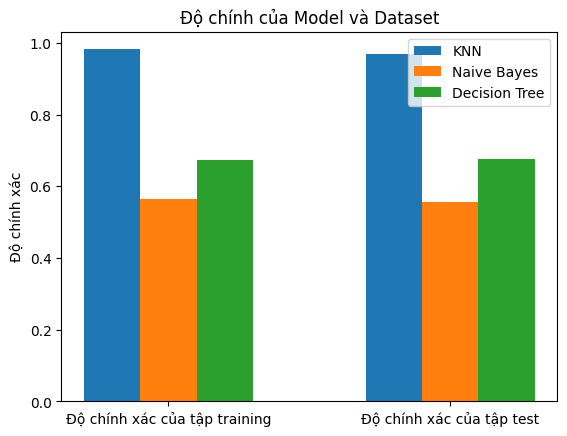

In [ ]:
# Flatten data
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

'''
Làm lại dữ liệu cho Decision Tree, Naive Bayes và KNN
'''

# Decision Tree model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(train_X, train_y)

train_y_pred_dt = dt.predict(train_X)
test_y_pred_dt = dt.predict(test_X)

train_acc_dt = accuracy_score(train_y, train_y_pred_dt)
test_acc_dt = accuracy_score(test_y, test_y_pred_dt)

# Naive Bayes model
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

train_y_pred_nb = nb_clf.predict(train_X)
test_y_pred_nb = nb_clf.predict(test_X)

train_acc_nb = accuracy_score(train_y, train_y_pred_nb)
test_acc_nb = accuracy_score(test_y, test_y_pred_nb)

# KNN với k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

train_y_pred = knn.predict(train_X)
test_y_pred = knn.predict(test_X)

train_acc_knn = accuracy_score(train_y, train_y_pred)
test_acc_knn = accuracy_score(test_y, test_y_pred)


'''
Phần biểu diễn
'''


labels = ['Độ chính xác của tập training', 'Độ chính xác của tập test']
knn_accuracies = [train_acc_knn, test_acc_knn]
nb_accuracies = [train_acc_nb, test_acc_nb]
dt_accuracies = [train_acc_dt, test_acc_dt]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, knn_accuracies, width, label='KNN')
rects2 = ax.bar(x, nb_accuracies, width, label='Naive Bayes')
rects3 = ax.bar(x + width, dt_accuracies, width, label='Decision Tree')

ax.set_ylabel('Độ chính xác')
ax.set_title('Độ chính của Model và Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
